In [1]:
#Import modules
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import urllib3
import pandas as pd
import warnings
from metpy.units import pandas_dataframe_to_unit_arrays, units
from datetime import datetime
warnings.simplefilter('ignore')

In [2]:
#What are the possible crop types?
df = pd.read_csv('cdl_2022_stat_clip_20230609045923_1995493459.csv')
data = np.array(df['Category'])
data

array(['Corn', 'Cotton', 'Rice', 'Sorghum', 'Soybeans', 'Sunflowers',
       'Peanuts', 'Sweet Corn', 'Pop or Orn Corn', 'Mint', 'Barley',
       'Durum Wheat', 'Spring Wheat', 'Winter Wheat',
       'Dbl Crop WinWht/Soybeans', 'Rye', 'Oats', 'Millet', 'Canola',
       'Flaxseed', 'Safflower', 'Mustard', 'Alfalfa',
       'Other Hay/Non Alfalfa', 'Buckwheat', 'Sugarbeets', 'Dry Beans',
       'Potatoes', 'Other Crops', 'Sugarcane', 'Sweet Potatoes',
       'Misc Vegs & Fruits', 'Watermelons', 'Onions', 'Cucumbers',
       'Chick Peas', 'Lentils', 'Peas', 'Herbs', 'Clover/Wildflowers',
       'Sod/Grass Seed', 'Switchgrass', 'Fallow/Idle Cropland', 'Peaches',
       'Apples', 'Grapes', 'Christmas Trees', 'Citrus', 'Pecans',
       'Walnuts', 'Aquaculture', 'Open Water', 'Developed/Open Space',
       'Developed/Low Intensity', 'Developed/Medium Intensity',
       'Developed/High Intensity', 'Barren', 'Deciduous Forest',
       'Evergreen Forest', 'Mixed Forest', 'Shrubland', 'Grass/Past

In [3]:
# Set your ARM Live data username and password.
username = 'username'
token = 'token'
n = input(f'Facility Number:')
# Set the datastream and dates for download.  Let's just look at one week to start
# If you don't know the datastream you can always download through data discovery as well
# https://adc.arm.gov/discovery/#/
# You can also easily change the facility (E14) to other ones as well
datastream = f'sgp30qcecorE{int(n)}.s1'
startdate = input(f'Input Start Date (YYYYMMDD):')
enddate = input(f'Input End Date (YYYYMMDD):')
b = input(f'Decide how to subset your data\n'
         'For weekly data, enter 336\n'
         'For daily data, enter 48\n'
         'For twice-daily data, enter 24\n'
         'For hourly data, enter 2\n'
         'For half-hourly data, enter 1\n'
         'Enter your number here:')
c = input(f'Decide the hour offset:')

# Download data using the webservice
qcecor_files = act.discovery.download_data(username, token, datastream, startdate, enddate)

# Download ECOR data using the webservice
datastream = f'sgp30ecorE{int(n)}.b1'
ecor_files = act.discovery.download_data(username, token, datastream, startdate, enddate)

Facility Number:14
Input Start Date (YYYYMMDD):20180101
Input End Date (YYYYMMDD):20181231
Decide how to subset your data
For weekly data, enter 336
For daily data, enter 48
For twice-daily data, enter 24
For hourly data, enter 2
For half-hourly data, enter 1
Enter your number here:48
Decide the hour offset:12
[DOWNLOADING] sgp30qcecorE14.s1.20180101.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180102.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180103.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180104.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180105.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180106.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180107.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180108.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180109.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180110.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180111.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180112.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180113.000000.nc
[DOWNLOADING] sgp30qcecor

[DOWNLOADING] sgp30qcecorE14.s1.20180605.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180606.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180607.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180608.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180609.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180610.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180611.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180612.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180613.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180614.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180615.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180616.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180617.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180618.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180619.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180620.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180621.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180622.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180623.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1

[DOWNLOADING] sgp30qcecorE14.s1.20181114.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181115.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181116.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181117.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181118.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181119.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181120.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181121.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181122.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181123.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181124.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181125.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181126.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181127.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181128.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181129.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181130.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181201.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20181202.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1

[DOWNLOADING] sgp30ecorE14.b1.20180405.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180407.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180406.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180411.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180408.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180412.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180409.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180410.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180413.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180414.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180415.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180416.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180419.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180420.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180417.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180418.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180418.130000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180421.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180422.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180423.000000.cdf


[DOWNLOADING] sgp30ecorE14.b1.20181115.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181116.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181117.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181118.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181119.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181120.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181121.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181122.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181123.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181125.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181126.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181127.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181212.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181213.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181214.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181215.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181216.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181217.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181218.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20181219.000000.cdf


In [4]:
# Reading in data to an xarray dataset is very easy using ACT
# ARM has some standards that can cause issues with the xarray reader at times
ds = act.io.armfiles.read_netcdf(qcecor_files)
ds_ecor = act.io.armfiles.read_netcdf(ecor_files)
ds_ecor

<xarray.Dataset>
Dimensions:           (time: 17476)
Coordinates:
  * time              (time) datetime64[ns] 2018-01-01 ... 2018-12-31T23:30:00
Data variables: (12/145)
    base_time         (time) datetime64[ns] 2018-01-01 2018-01-01 ... 2018-12-31
    time_offset       (time) datetime64[ns] 2018-01-01 ... 2018-12-31T23:30:00
    mean_u            (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    qc_mean_u         (time) int32 dask.array<chunksize=(48,), meta=np.ndarray>
    mean_v            (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    qc_mean_v         (time) int32 dask.array<chunksize=(48,), meta=np.ndarray>
    ...                ...
    n_bad_irga        (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    n_bad_irga_light  (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    mean_cooler       (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    lat               (time) float32 36.61 36.61 36.61 ... 36.61 36.61 36.61
    lon               (time) float32 -97.49 -97.49 -97.49 ... -97.49 -97.49
    alt               (time) float32 315.0 315.0 315.0 ... 315.0 315.0 315.0
Attributes: (12/44)
    command_line:              ecor_ingest -s sgp -f E14
    process_version:           ingest-ecor-13.4-0.el6
    dod_version:               30ecor-b1-2.2
    input_source:              /data/collection/sgp/sgpecorE14.00/2018_0101_0...
    site_id:                   sgp
    platform_id:               30ecor
    ...                        ...
    ingest_software:           ingest-ecor-13.4-0.el6
    history:                   created by user dsmgr on machine ruby at 2018-...
    _file_dates:               ['20180101', '20180102', '20180103', '20180104...
    _file_times:               ['000000', '000000', '000000', '000000', '0000...
    _datastream:               sgp30ecorE14.b1
    _arm_standards_flag:       1

In [5]:
#Get variables in the proper format
wspd = ds_ecor['wind_spd'].values
wdir = ds_ecor['wind_dir'].values
ustar = ds_ecor['ustar'].values
h = ds['sensible_heat_flux'].values
lv = ds['latent_heat_flux'].values
fc = ds_ecor['fc'].values
lat = ds['lat'].values
lon = ds['lon'].values
times = ds_ecor['time'].values
year = times.astype('datetime64[Y]').astype(int) + 1970

In [6]:
#Subset the times
time=[]
for t in range(2*int(c), len(times), int(b)):
    time.append(times[t])
time = np.array(time)
print(time)

['2018-01-01T12:00:00.000000000' '2018-01-02T12:00:00.000000000'
 '2018-01-03T12:00:00.000000000' '2018-01-04T12:00:00.000000000'
 '2018-01-05T12:00:00.000000000' '2018-01-06T12:00:00.000000000'
 '2018-01-07T12:00:00.000000000' '2018-01-08T12:00:00.000000000'
 '2018-01-09T12:00:00.000000000' '2018-01-10T12:00:00.000000000'
 '2018-01-11T12:00:00.000000000' '2018-01-12T12:00:00.000000000'
 '2018-01-13T12:00:00.000000000' '2018-01-14T12:00:00.000000000'
 '2018-01-16T05:00:00.000000000' '2018-01-17T05:00:00.000000000'
 '2018-01-18T05:00:00.000000000' '2018-01-19T05:00:00.000000000'
 '2018-01-20T05:00:00.000000000' '2018-01-21T05:00:00.000000000'
 '2018-01-22T05:00:00.000000000' '2018-01-23T05:00:00.000000000'
 '2018-01-24T05:00:00.000000000' '2018-01-25T05:00:00.000000000'
 '2018-01-26T05:00:00.000000000' '2018-01-27T05:00:00.000000000'
 '2018-01-28T05:00:00.000000000' '2018-01-29T05:00:00.000000000'
 '2018-01-30T05:00:00.000000000' '2018-01-31T05:00:00.000000000'
 '2018-02-01T05:00:00.000

In [7]:
#Subset the data and put into a text file
outfile = open(f'flux_data.txt', 'w')
for a in range(2*int(c), len(times), int(b)):
    outfile.writelines(f'{(wdir[a]):6.2f}  {(wspd[a]):.2f}  {(h[a]):6.2f}  {(lv[a]):6.2f}  {(fc[a]):5.2f}  {(lat[a]):.2f}  {(lon[a]):.2f}')
    outfile.writelines(f'\n')
outfile.close()
ds1 = np.loadtxt('flux_data.txt')
ds1

array([[ 1.224e+01,  3.570e+00, -4.880e+00, ...,  6.300e-01,  3.661e+01,
        -9.749e+01],
       [ 6.818e+01,  1.270e+00,  6.100e-01, ...,  6.000e-02,  3.661e+01,
        -9.749e+01],
       [ 2.857e+02,  2.230e+00, -2.149e+01, ...,  7.700e-01,  3.661e+01,
        -9.749e+01],
       ...,
       [ 3.560e+02,  3.820e+00,  2.046e+01, ..., -3.100e-01,  3.661e+01,
        -9.749e+01],
       [ 1.888e+02,  3.830e+00, -1.362e+01, ...,  5.300e-01,  3.661e+01,
        -9.749e+01],
       [ 1.470e+02,  2.910e+00, -4.479e+01, ...,        nan,  3.661e+01,
        -9.749e+01]])

In [8]:
#Turn the text file into an xarray dataset
ds2 = xr.Dataset(
    data_vars=dict(
        sensible_heat_flux=(["time"], ds1[0:,2]),
        latent_heat_flux=(["time"], ds1[0:,3]),
        wdir2=(["time"], ds1[0:,0]),
        wspd2=(["time"], ds1[0:,1]),
        co2_flux=(["time"], ds1[0:,4]),
    ),
    coords=dict(
        lat=ds1[0:,5],
        lon=ds1[0:,6],
    ),
    attrs=dict(description="Flux Data"),
)
ds2['time'] = time
ds2

<xarray.Dataset>
Dimensions:             (time: 364, lat: 364, lon: 364)
Coordinates:
  * lat                 (lat) float64 36.61 36.61 36.61 ... 36.61 36.61 36.61
  * lon                 (lon) float64 -97.49 -97.49 -97.49 ... -97.49 -97.49
  * time                (time) datetime64[ns] 2018-01-01T12:00:00 ... 2018-12...
Data variables:
    sensible_heat_flux  (time) float64 -4.88 0.61 -21.49 ... 20.46 -13.62 -44.79
    latent_heat_flux    (time) float64 3.32 2.97 -0.13 -0.31 ... 16.29 7.07 nan
    wdir2               (time) float64 12.24 68.18 285.7 ... 356.0 188.8 147.0
    wspd2               (time) float64 3.57 1.27 2.23 1.81 ... 3.82 3.83 2.91
    co2_flux            (time) float64 0.63 0.06 0.77 0.44 ... -0.31 0.53 nan
Attributes:
    description:  Flux Data

In [9]:
#Turn the data into individual variables
wdir2 = ds2['wdir2']
wspd2 = ds2['wspd2']
sensible_heat_flux = ds2['sensible_heat_flux']
latent_heat_flux = ds2['latent_heat_flux']
co2_flux = ds2['co2_flux'] 

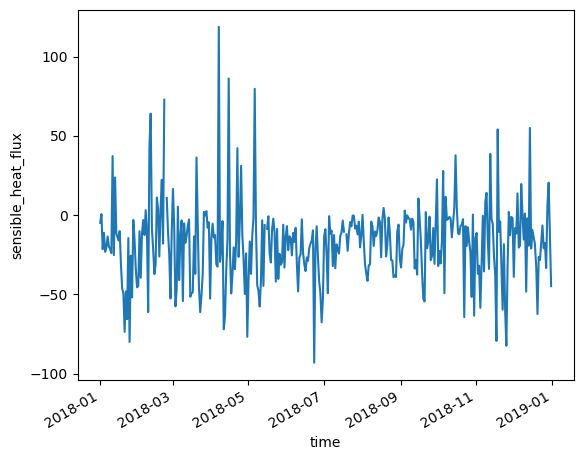

In [10]:
# We can use xarray funcationality to quickly plot up the data
ds2['sensible_heat_flux'].plot()

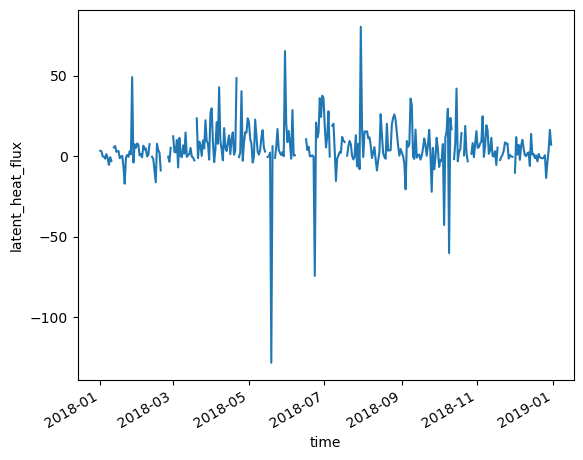

In [11]:
ds2['latent_heat_flux'].plot()

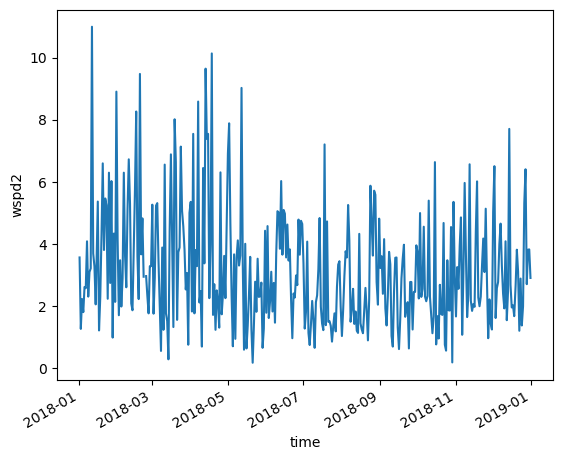

In [12]:
# Let's just make sure the wind data looks good as well
ds2['wspd2'].plot()

In [13]:
# First, let's build a function that has the "Good" fetch directions defined
def get_arm_fetch(site, fac):
    """
    Each SGP ECOR site has specific directions where the fetch is good
    These ranges list are of good fetch directions
    """
    ranges=[]
    if site == 'sgp':
        if fac == 'E1':  #ECOR
            ranges = [[0, 53], [120, 360]]
        if fac == 'E2':  # EBBR
            ranges = [[71, 137], [223, 289]]
        if fac == 'E3':  #ECOR
            ranges = [[0, 48], [132, 260]]
        if fac == 'E4':  # EBBR
            ranges = [[0, 158], [202, 360]]
        if fac == 'E5':  #ECOR
            ranges = [[80, 154], [154, 260]]
        if fac == 'E6':  #ECOR
            ranges = [[0, 360]]
        if fac == 'E7':  # EBBR
            ranges = [[0, 244], [296, 360]]
        if fac == 'E8':  # EBBR
            ranges = [[0, 224], [314, 360]]
        if fac == 'E9':  # EBBR
            ranges = [[0, 360]]
        if fac == 'E10':  #ECOR
            ranges = [[0, 360]]
        if fac == 'E11':  # EBBR
            ranges = [[0, 360]]
        if fac == 'E12':  # EBBR
            ranges = [[0, 360]]
        if fac == 'E13':  # EBBR
            ranges = [[0, 52], [142, 194], [328, 360]]
        if fac == 'E14':  #ECOR
            ranges = [[129, 265], [352, 360], [0, 85]]
        if fac == 'E15':  # EBBR
            ranges = [[133, 360]]
        if fac == 'E16':  #ECOR
            ranges = [[134, 269], [334, 360]]
        if fac == 'E18':  # EBBR
            ranges = [[138, 325]]
        if fac == 'E19':  # EBBR
            ranges = [[0, 133], [151, 360]]
        if fac == 'E20':  # EBBR
            ranges = [[0, 230], [310, 360]]
        if fac == 'E21':  #ECOR
            ranges = [[30, 360]]
        if fac == 'E22':  # EBBR
            ranges = [[0, 49], [139, 360]]
        if fac == 'E24':  #ECOR
            ranges = [[80, 280]]
        if fac == 'E25':  # EBBR
            ranges = [[30, 360]]
        if fac == 'E26':  # EBBR
            ranges = [[0, 33], [243, 360]]
        if fac == 'E27':  # EBBR
            ranges = [[20,156]]
        if fac == 'E31':  #ECOR
            ranges = [[100, 200], [30, 80]]
        if fac == 'E32':  # EBBR
            ranges = [[0,360]]
        if fac == 'E33':  #ECOR
            ranges = [[100, 300], [40, 80]]
        if fac == 'E34':  # EBBR
            ranges = [[0,360]]
        if fac == 'E35':  # EBBR
            ranges = [[0,360]]
        if fac == 'E36':  # EBBR
            ranges = [[0,360]]
        if fac == 'E37':  #ECOR
            ranges = [[135, 260], [280, 310]]
        if fac == 'E38':  #ECOR
            ranges = [[150, 260]]
        if fac == 'E39':  #ECOR
            ranges = [[100, 260], [280, 360], [0, 80]]
        if fac == 'E40':  # EBBR
            ranges = [[0,360]]
        if fac == 'E41':  #ECOR
            ranges = [[100, 260], [280, 360], [0, 80]]

    return ranges

In [14]:
urllib3.disable_warnings()
# Get good fetch ranges for this site
site = ds.attrs['site_id']
fac = ds.attrs['facility_id']
ranges = get_arm_fetch(site, fac)
#Get the crop types
crop = []

for i, d in enumerate(wdir2):
    lat2, lon2 = act.utils.geo_utils.destination_azimuth_distance(lat[0], lon[0], d, 100.)
    if np.isnan(lat2) or np.isnan(lon2):
        crop.append(np.nan)
    else:
        crop.append(act.discovery.get_cropscape.croptype(lat2, lon2, year[i]))
        print(crop[i], i+1)

Developed/Open Space 1
Winter Wheat 2
Alfalfa 3
Fallow/Idle Cropland 4
Alfalfa 5
Grass/Pasture 6
Grass/Pasture 7
Alfalfa 8
Grass/Pasture 9
Grass/Pasture 10
Developed/Open Space 11
Developed/Open Space 12
Developed/Open Space 13
Grass/Pasture 14
Developed/Open Space 15
Winter Wheat 16
Grass/Pasture 17
Winter Wheat 18
Winter Wheat 19
Grass/Pasture 20
Alfalfa 21
Alfalfa 22
Alfalfa 23
Winter Wheat 24
Winter Wheat 25
Developed/Open Space 26
Alfalfa 27
Developed/Open Space 28
Grass/Pasture 29
Winter Wheat 30
Winter Wheat 31
Developed/Open Space 32
Winter Wheat 33
Alfalfa 34
Winter Wheat 35
Developed/Open Space 36
Developed/Open Space 37
Alfalfa 38
Winter Wheat 39
Developed/Open Space 40
Developed/Open Space 41
Grass/Pasture 42
Grass/Pasture 43
Winter Wheat 44
Winter Wheat 45
Developed/Open Space 46
Grass/Pasture 47
Winter Wheat 48
Winter Wheat 49
Developed/Open Space 50
Developed/Open Space 51
Developed/Low Intensity 52
Developed/Open Space 54
Alfalfa 55
Alfalfa 56
Grass/Pasture 57
Grass/Pas

In [15]:
#Create an array of the crop types, then add it to our dataset
da = xr.DataArray(data=crop, dims=ds2['wdir2'].dims, name='crop_type')
ds2['crop_type']=da


In [16]:
 #What crop types are we working with?
crop_list = []
for j in range(0, 89):
    if data[j] in da:
        if len(np.where(da == data[j])[0]) > 1:
            crop_list.append(data[j])
crop_list

['Winter Wheat',
 'Alfalfa',
 'Fallow/Idle Cropland',
 'Developed/Open Space',
 'Developed/Low Intensity',
 'Grass/Pasture']

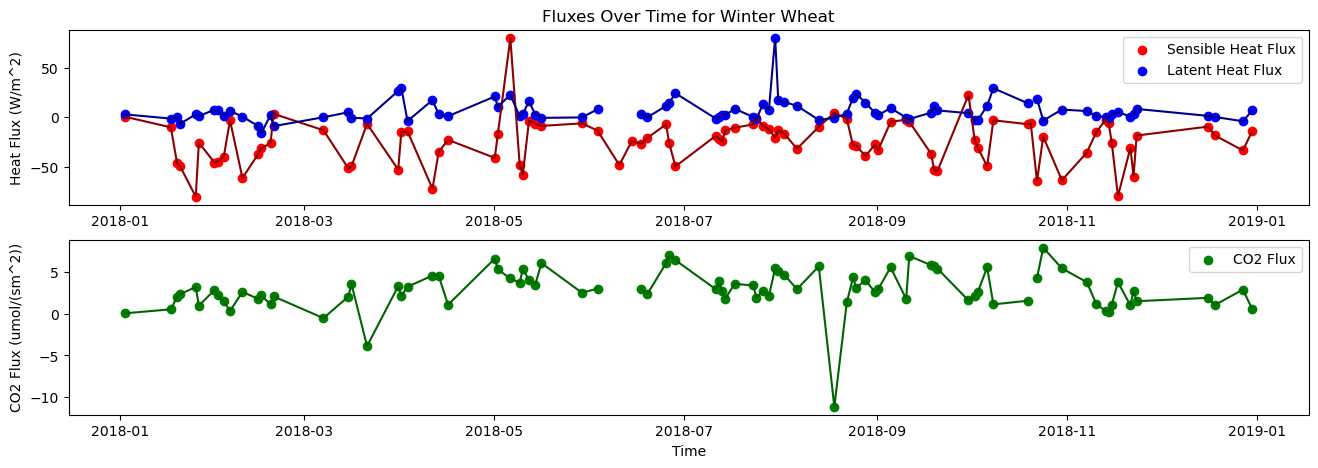

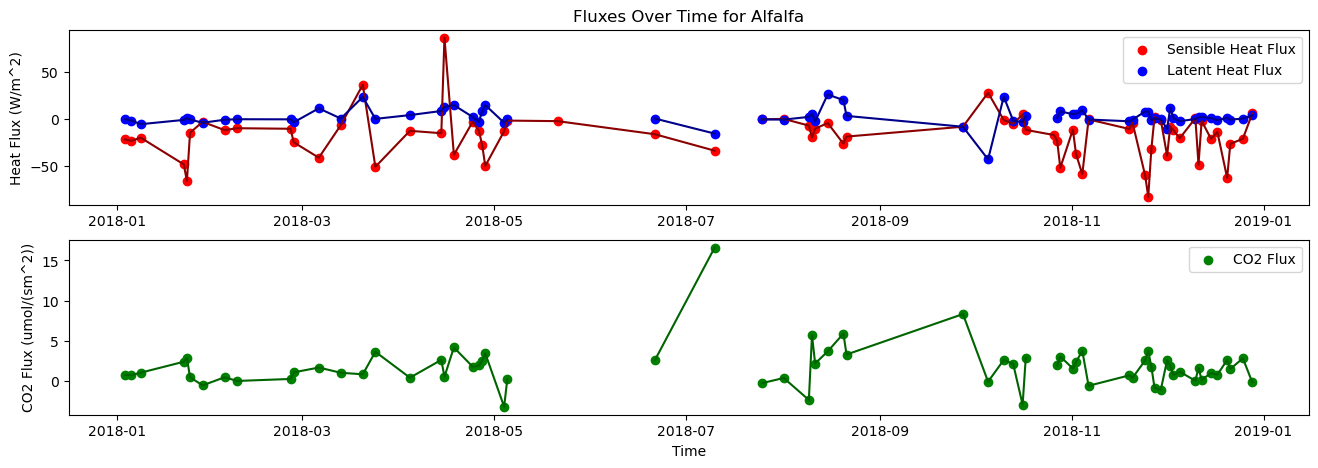

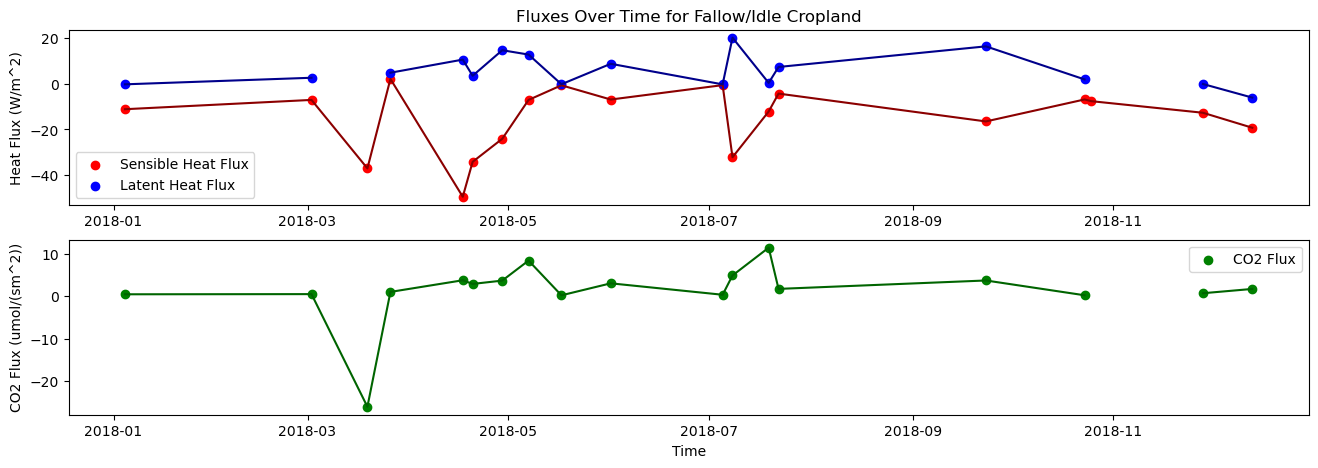

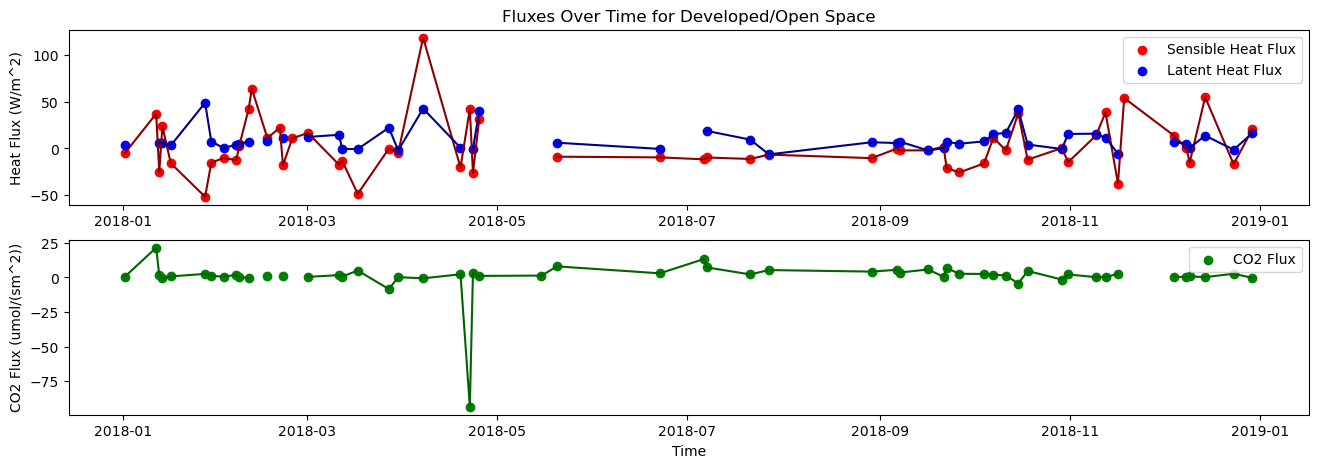

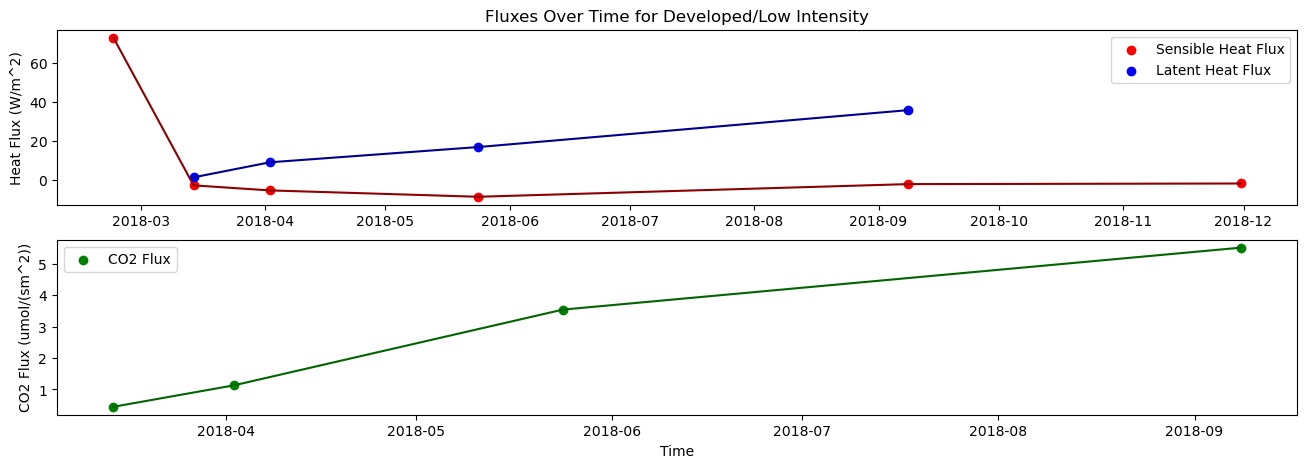

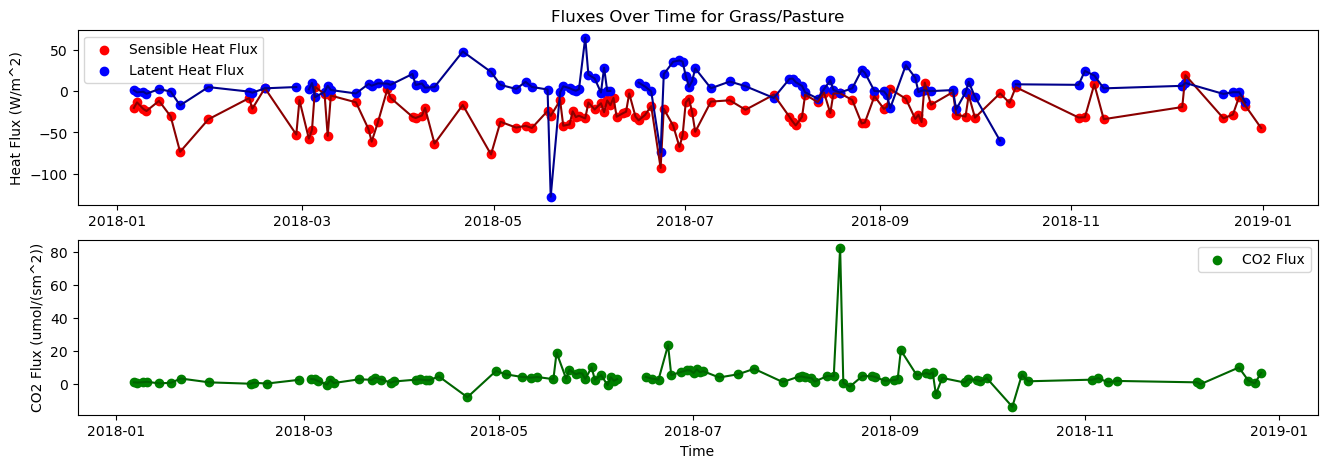

In [17]:
#Flux-Time Graphs
for x in range(0, len(crop_list)):     
    y = np.where(da == crop_list[x])
    plt.figure(figsize=(16, 5))
    ax = plt.subplot(211)
    ax.scatter(time[y], sensible_heat_flux[y], color = 'red', label = 'Sensible Heat Flux')
    ax.scatter(time[y], latent_heat_flux[y], color = 'blue', label = 'Latent Heat Flux')
    ax.plot(time[y], sensible_heat_flux[y], color = 'darkred')
    ax.plot(time[y], latent_heat_flux[y], color = 'darkblue')
    ax.set_ylabel('Heat Flux (W/m^2)')
    ax.set_title(f"Fluxes Over Time for {crop_list[x]}")
    ax.legend()
    ax = plt.subplot(212)
    ax.scatter(time[y], co2_flux[y], color = 'green', label = 'CO2 Flux')
    ax.plot(time[y], co2_flux[y], color = 'darkgreen')
    ax.set_xlabel('Time')
    ax.set_ylabel('CO2 Flux (umol/(sm^2))')
    ax.legend()

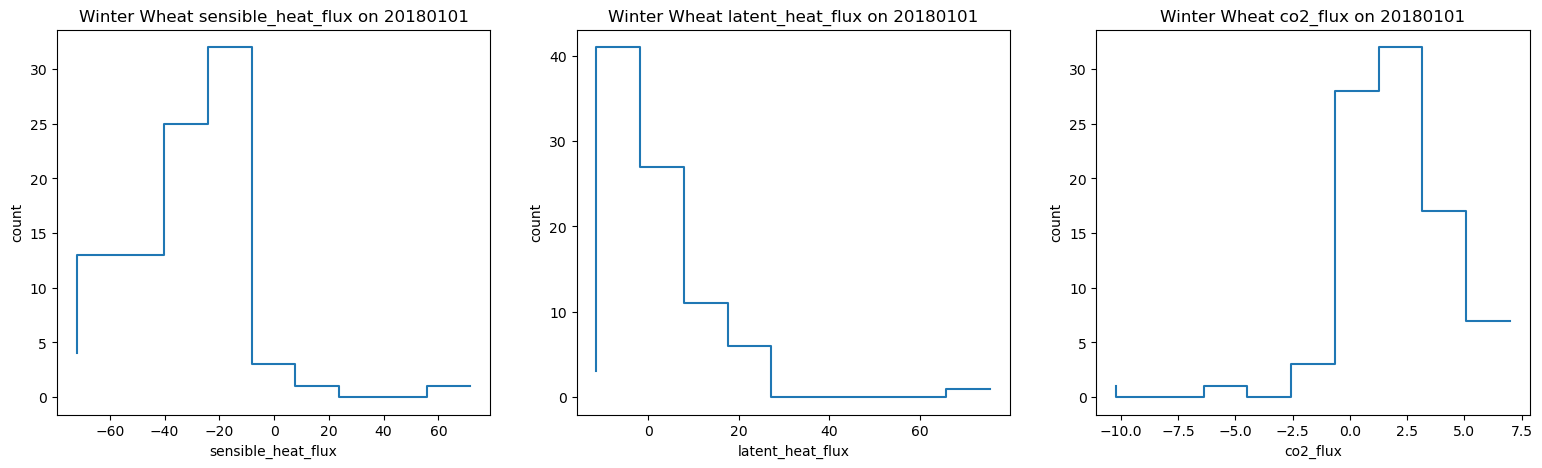

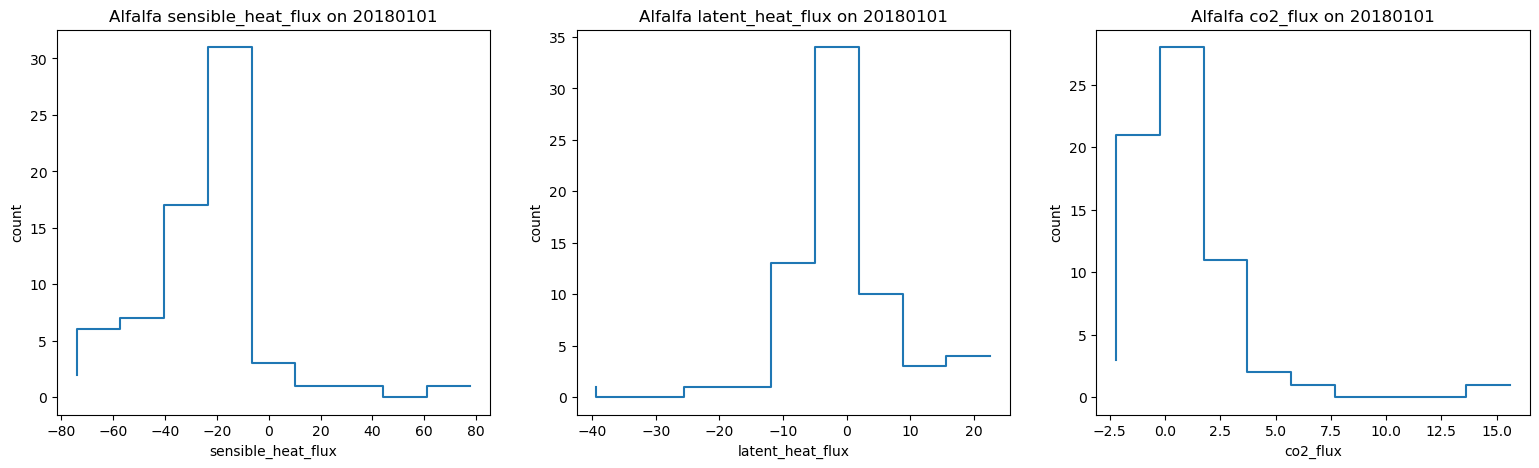

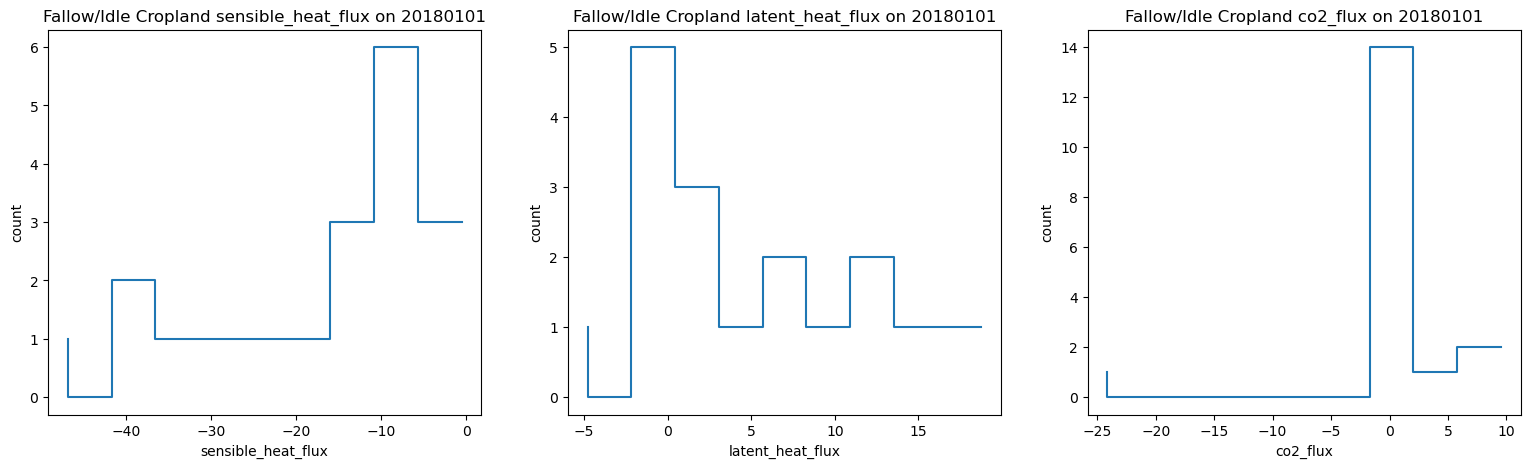

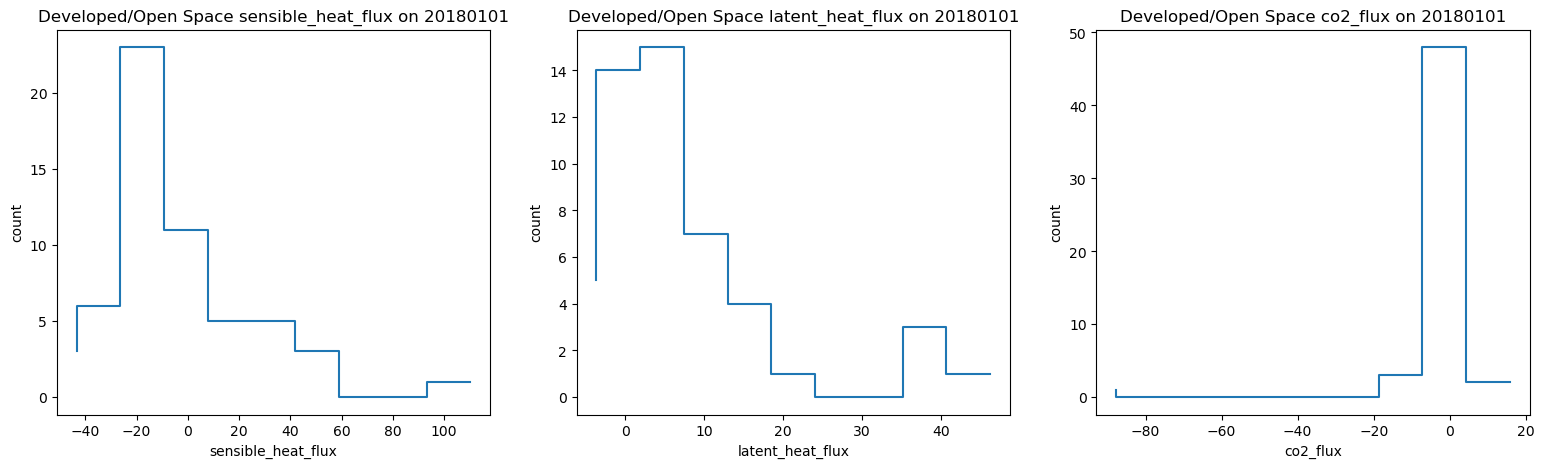

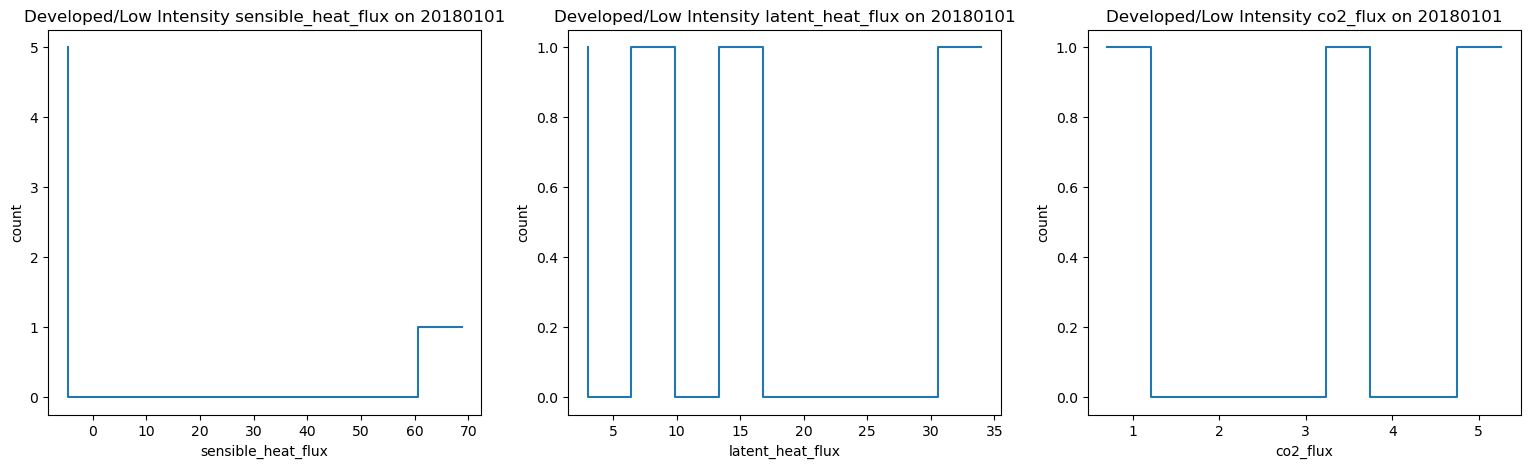

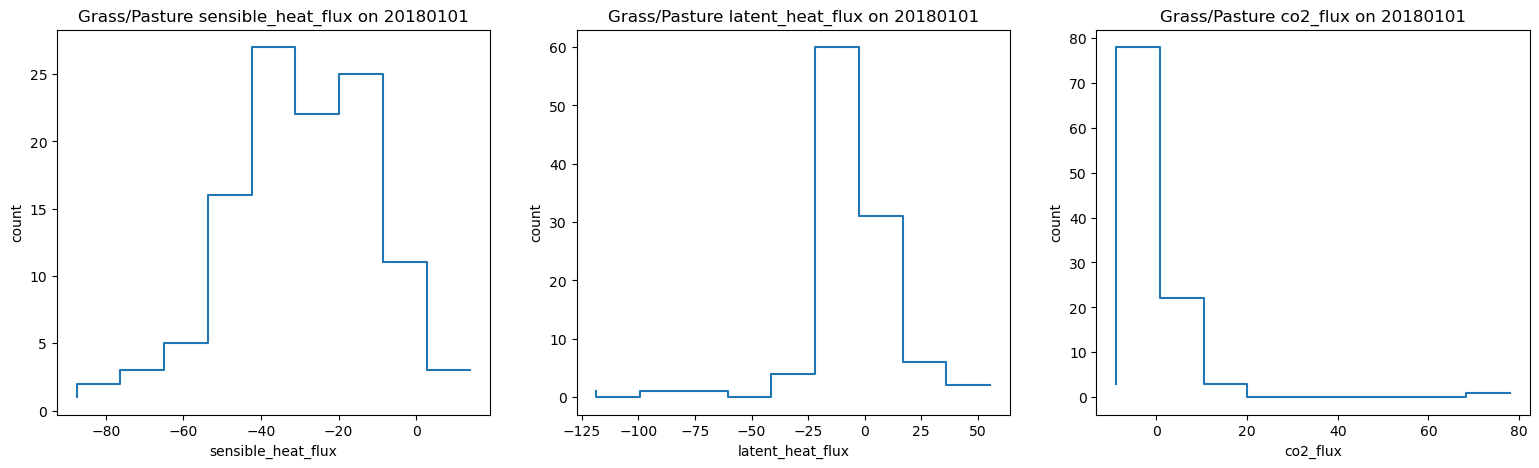

In [18]:
#Histograms
for x in range(0, len(crop_list)):  
    ds3 = ds2.where(ds2.crop_type == f'{crop_list[x]}')
    hist = act.plotting.HistogramDisplay({f'{crop_list[x]}': ds3}, subplot_shape=(1,3), figsize=(19, 5))
    hist.plot_stairstep_graph('sensible_heat_flux', dsname=f'{crop_list[x]}', subplot_index=(0,0), label=f'{crop_list[x]}')
    hist.plot_stairstep_graph('latent_heat_flux', dsname=f'{crop_list[x]}', subplot_index=(0,1), label=f'{crop_list[x]}')
    hist.plot_stairstep_graph('co2_flux', dsname=f'{crop_list[x]}', subplot_index=(0,2), label=f'{crop_list[x]}')

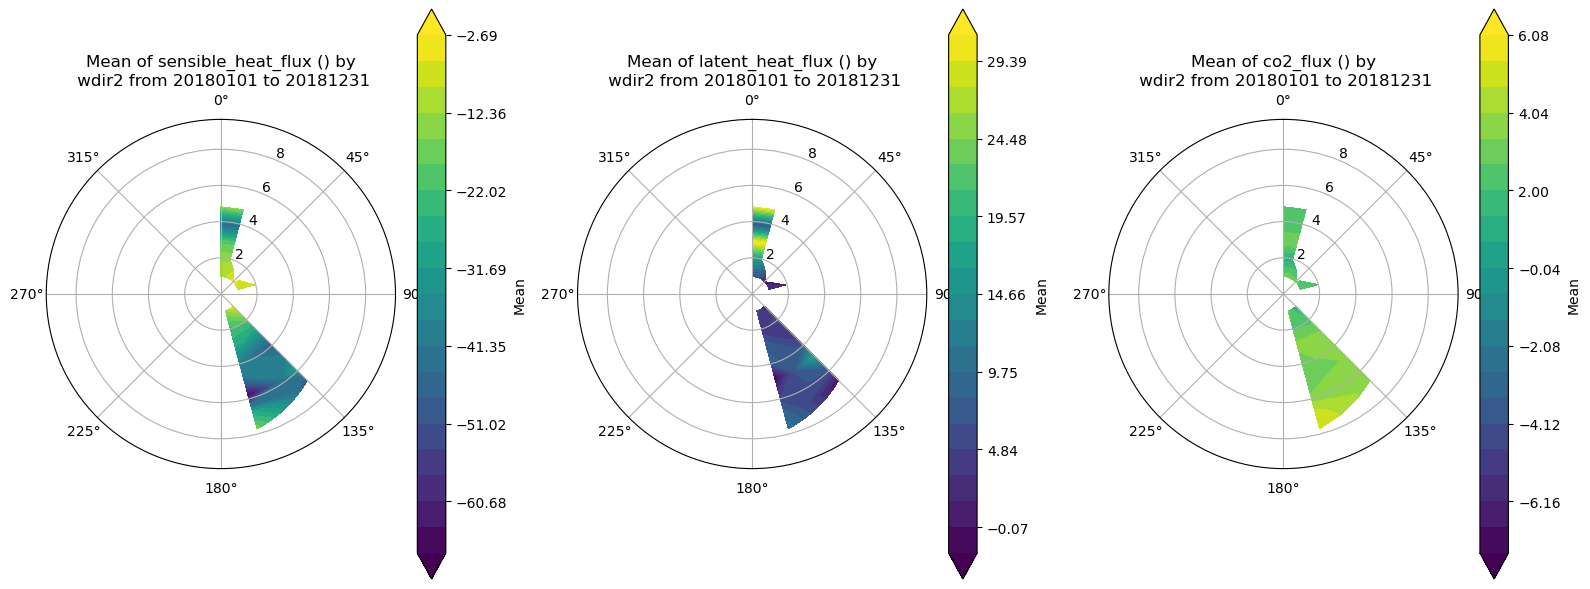

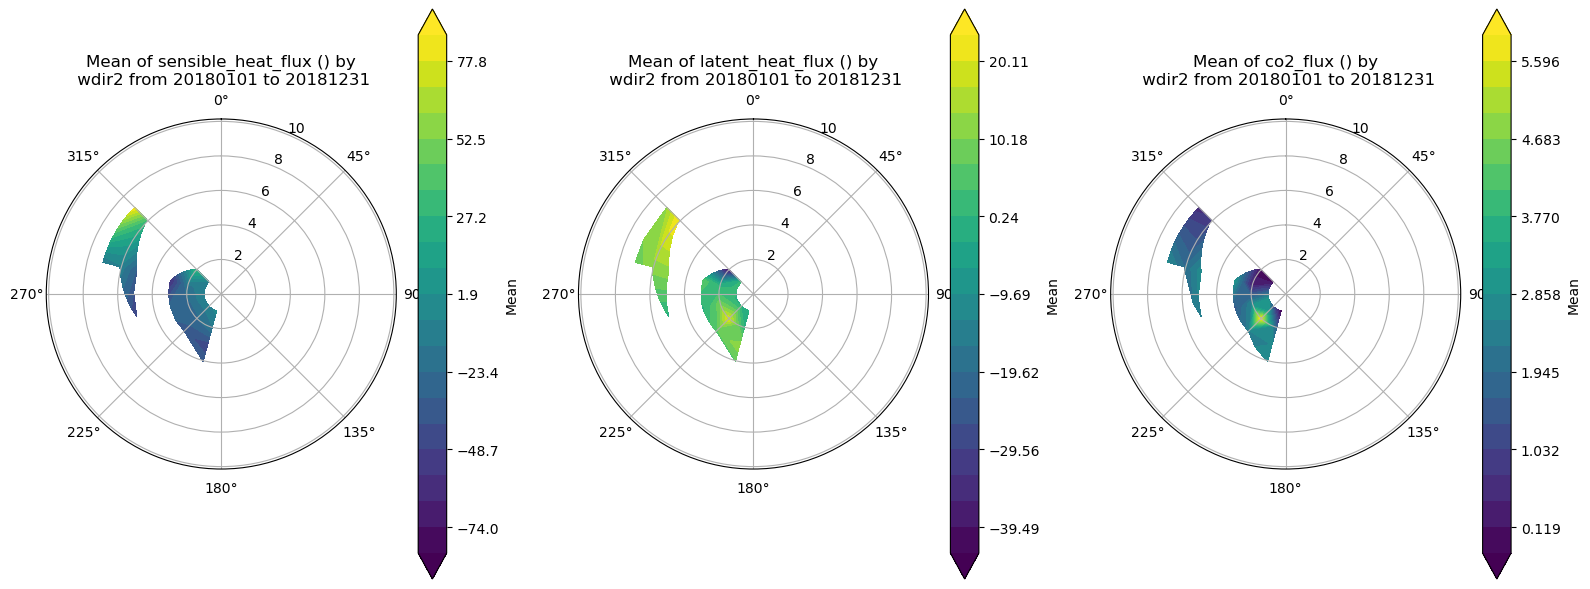

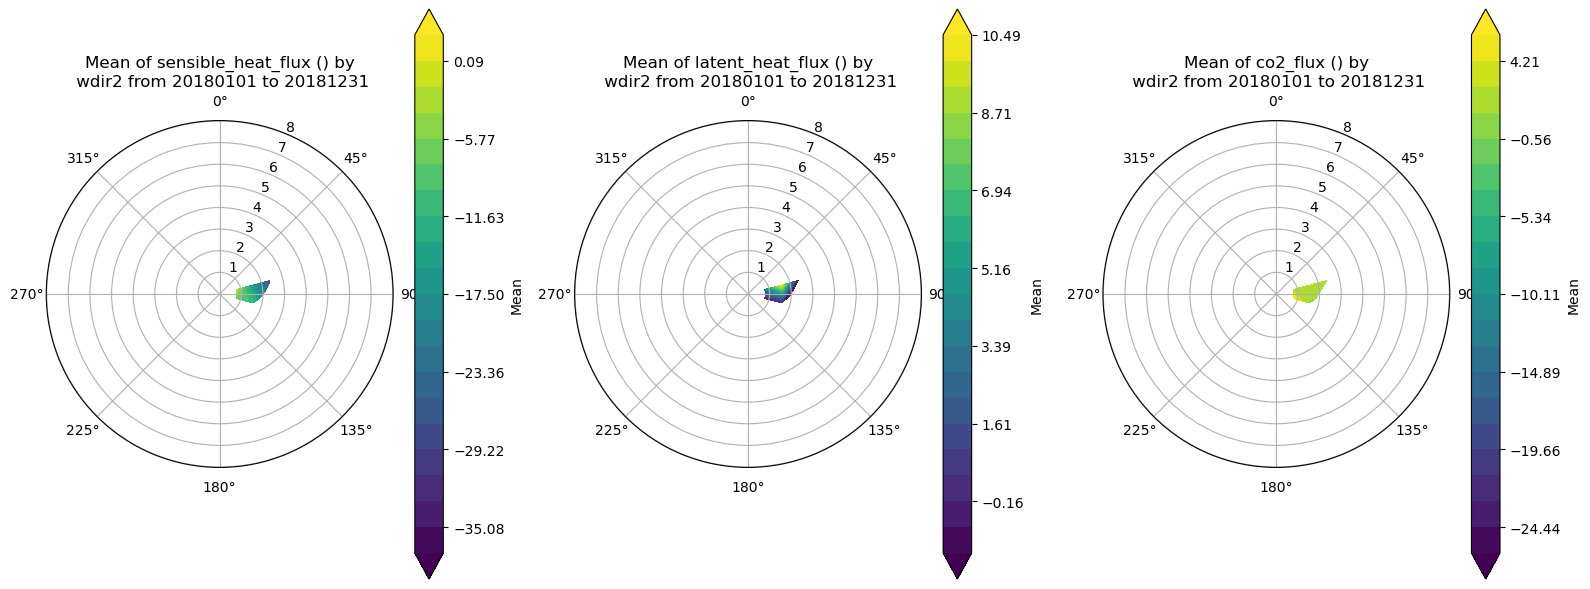

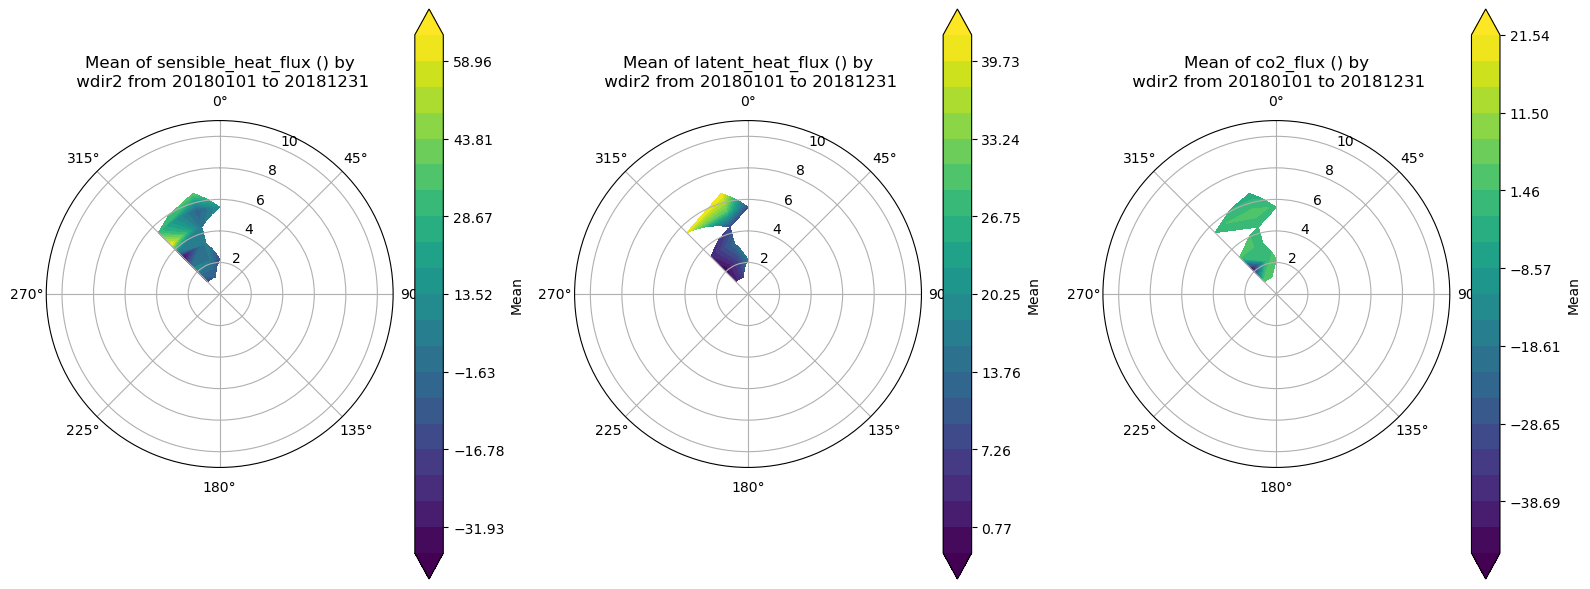

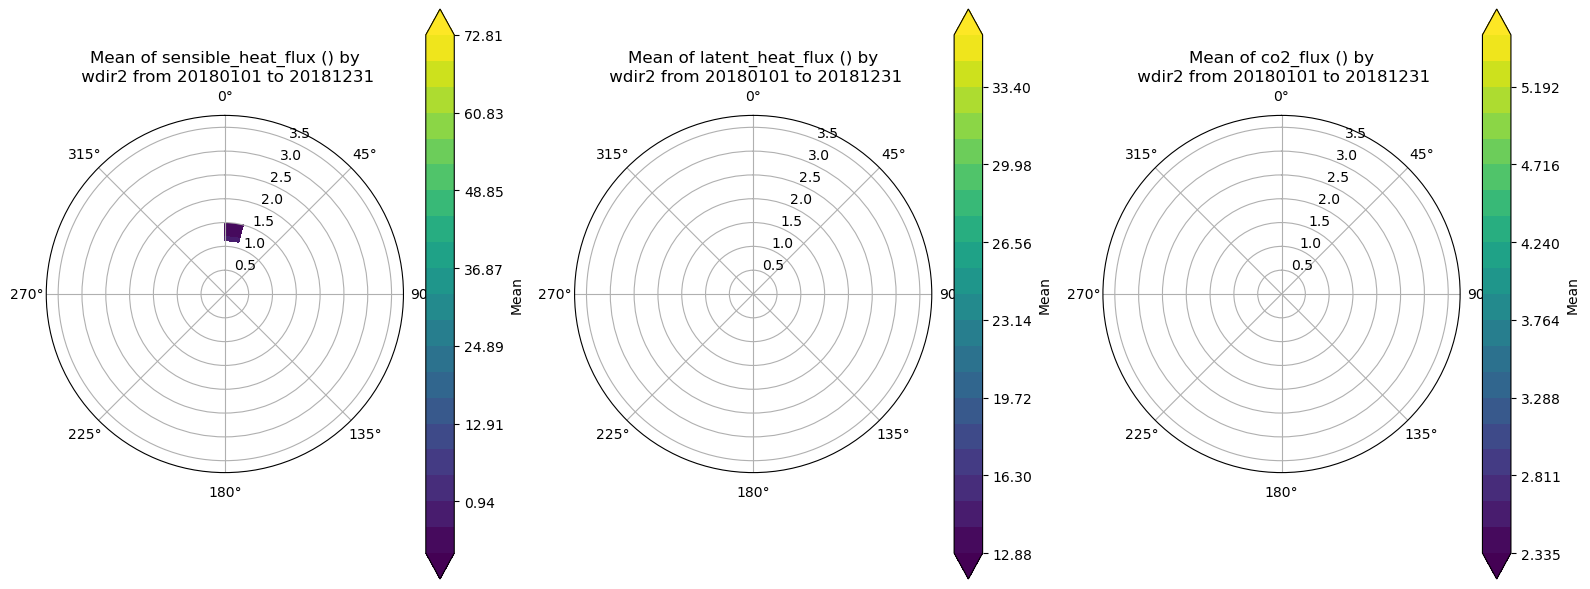

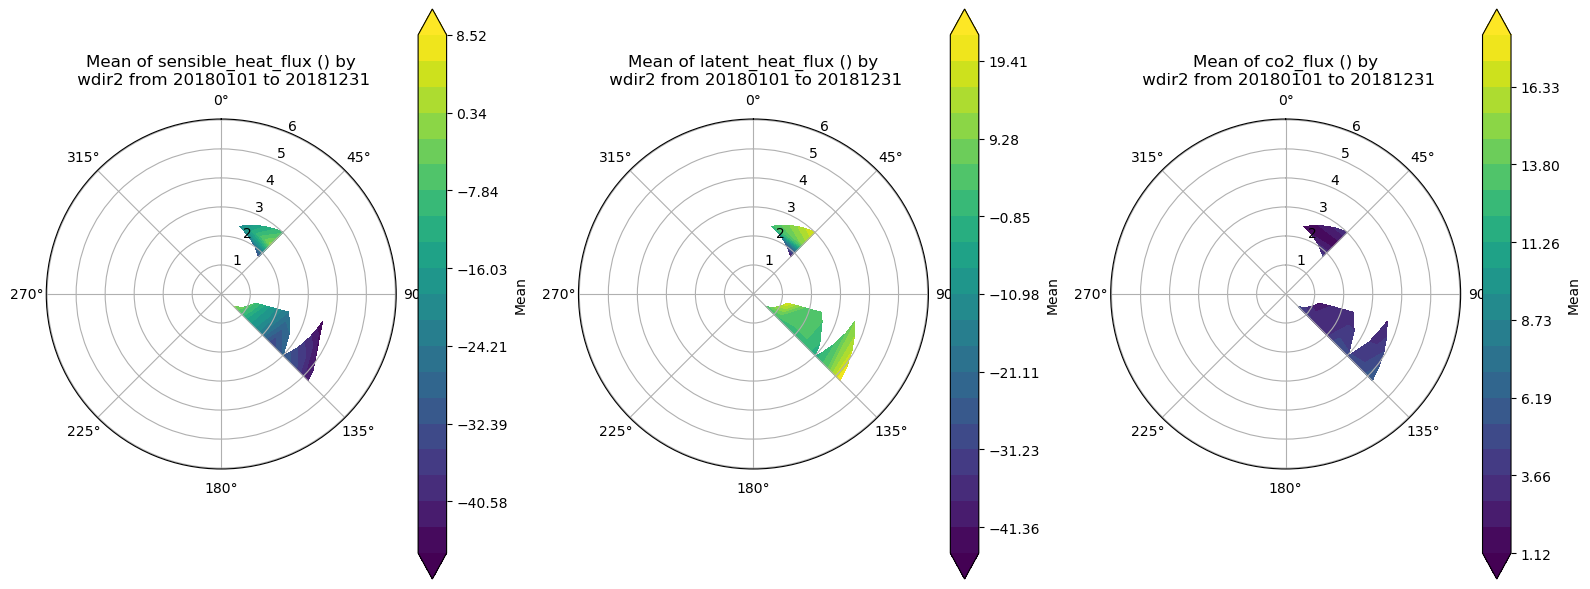

In [19]:
#Polar Coordinate Graphs
for x in range(0, len(crop_list)):

    ds3 = ds2.where(ds2.crop_type == f'{crop_list[x]}')
    
    display = act.plotting.WindRoseDisplay({f'{crop_list[x]}': ds3},
                                           subplot_shape=(1,3), figsize=(16,6))
    display.plot_data('wdir2', 'wspd2', 'sensible_heat_flux', num_dirs=12, plot_type='contour', 
                      dsname=f'{crop_list[x]}', subplot_index=(0,0), contour_type='mean', num_data_bins=10,
    clevels=21)
    display.plot_data('wdir2', 'wspd2', 'latent_heat_flux', num_dirs=12, plot_type='contour', 
                      dsname=f'{crop_list[x]}', subplot_index=(0,1), contour_type='mean', num_data_bins=10,
    clevels=21)
    display.plot_data('wdir2', 'wspd2', 'co2_flux', num_dirs=12, plot_type='contour', 
                      dsname=f'{crop_list[x]}', subplot_index=(0,2), contour_type='mean', num_data_bins=10,
    clevels=21)